In [1]:
pip install tensorflow

In [2]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import fashion_mnist
from  tensorflow.keras.utils import to_categorical,plot_model 
import tensorflow as tf

In [3]:
mnist = tf.keras.datasets.mnist
(xtrain, ytrain),(xtest, ytest) = mnist.load_data()
print(xtrain.shape)
print(ytrain.shape)
print(xtest.shape)
print(ytest.shape)

(60000, 28, 28)
(60000,)
(10000, 28, 28)
(10000,)


4


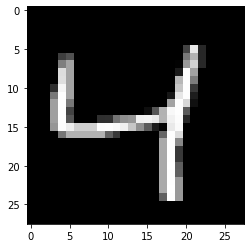

In [4]:
idx = 2
plt.imshow(xtrain[idx], cmap = "gray")
print(ytrain[idx])
plt.show()

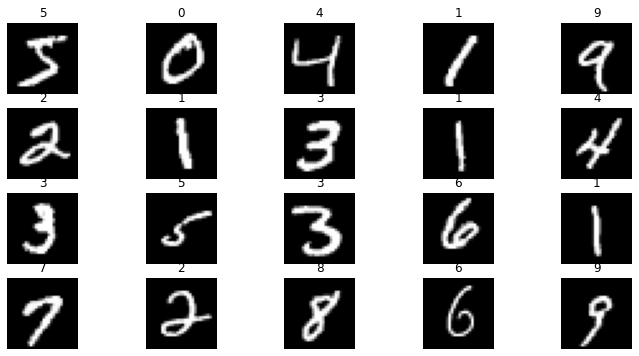

In [5]:
fig, axes = plt.subplots(nrows = 4, ncols = 5, figsize = (12, 6))
axes = axes.flatten()
for i, ax in zip(range(20), axes):
    ax.imshow(xtrain[i], cmap = "gray")
    ax.set_title(ytrain[i])
    ax.axis('off')
plt.show()

In [6]:
print(xtrain.shape)
print(xtest.shape)
xtrain=xtrain.reshape(60000,28,28,1)
xtest=xtest.reshape(10000,28,28,1)
print(xtrain.shape)
print(xtest.shape)

(60000, 28, 28)
(10000, 28, 28)
(60000, 28, 28, 1)
(10000, 28, 28, 1)


In [7]:
xtrain = xtrain/255
xtest = xtest/255

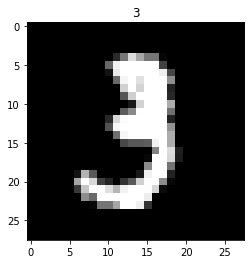

In [8]:
idx = 10
plt.imshow(xtrain[idx].reshape(28,28), cmap = "gray")
plt.title(ytrain[idx])
plt.show()

In [9]:
print(ytest)
print(ytrain)

[7 2 1 ... 4 5 6]
[5 0 4 ... 5 6 8]


In [10]:
print(ytrain.shape)
print(ytest.shape)
ytrain=to_categorical(ytrain)
ytest=to_categorical(ytest)
print(ytrain.shape)
print(ytest.shape)

(60000,)
(10000,)
(60000, 10)
(10000, 10)


In [11]:
ytrain[0:10]

array([[0., 0., 0., 0., 0., 1., 0., 0., 0., 0.],
       [1., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 1., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.]], dtype=float32)

In [12]:
from tensorflow.keras import models,layers
from keras.layers import Dense, Dropout, Flatten ,BatchNormalization

model=models.Sequential()

model.add(layers.Conv2D(filters=10,kernel_size=(2,2),input_shape=(28,28,1),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=12,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))

model.add(layers.Conv2D(filters=20,kernel_size=(2,2),activation='relu'))
model.add(layers.MaxPooling2D(pool_size=(2, 2)))
model.add(layers.Flatten())

model.add(layers.Dense(150,activation='relu'))

model.add(layers.Dense(100,activation='relu'))
model.add(layers.Dense(50,activation='relu'))
model.add(layers.Dense(10,activation='softmax'))

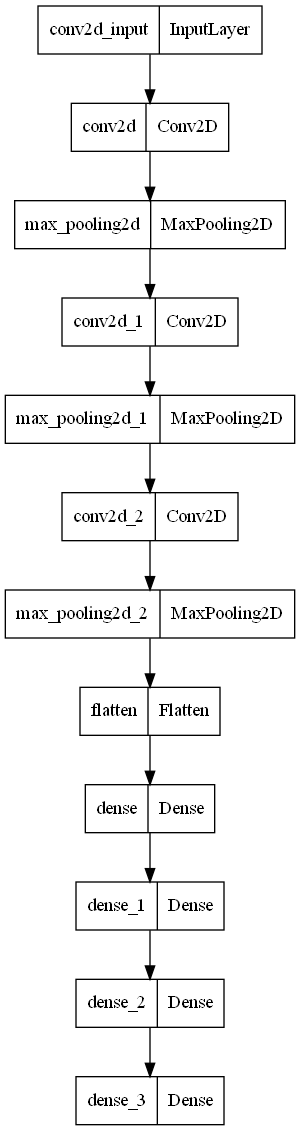

In [13]:
plot_model(model)

In [37]:
pip install pydot

In [38]:
pip install graphviz

Note: you may need to restart the kernel to use updated packages.


In [14]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        492       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 20)          980       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 20)         0

In [15]:
model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics = ['accuracy'])
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 27, 27, 10)        50        
                                                                 
 max_pooling2d (MaxPooling2D  (None, 13, 13, 10)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 12, 12, 12)        492       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 6, 6, 12)         0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 5, 5, 20)          980       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 2, 2, 20)         0

In [16]:
history = model.fit(xtrain, ytrain, epochs=22, batch_size = 1000, verbose = True, validation_data = (xtest, ytest))

Epoch 1/22
60/60 [==============================] - 4s 52ms/step - loss: 1.6372 - accuracy: 0.4934 - val_loss: 0.7858 - val_accuracy: 0.7577
Epoch 2/22
60/60 [==============================] - 3s 51ms/step - loss: 0.5582 - accuracy: 0.8231 - val_loss: 0.3879 - val_accuracy: 0.8749
Epoch 3/22
60/60 [==============================] - 3s 49ms/step - loss: 0.3371 - accuracy: 0.8933 - val_loss: 0.2784 - val_accuracy: 0.9106
Epoch 4/22
60/60 [==============================] - 3s 49ms/step - loss: 0.2612 - accuracy: 0.9172 - val_loss: 0.2151 - val_accuracy: 0.9334
Epoch 5/22
60/60 [==============================] - 3s 48ms/step - loss: 0.2150 - accuracy: 0.9326 - val_loss: 0.1903 - val_accuracy: 0.9388
Epoch 6/22
60/60 [==============================] - 3s 49ms/step - loss: 0.1918 - accuracy: 0.9397 - val_loss: 0.1677 - val_accuracy: 0.9474
Epoch 7/22
60/60 [==============================] - 3s 49ms/step - loss: 0.1722 - accuracy: 0.9461 - val_loss: 0.1466 - val_accuracy: 0.9536
Epoch 8/22
60

313/313 - 0s - loss: 0.0769 - accuracy: 0.9761 - 471ms/epoch - 2ms/step


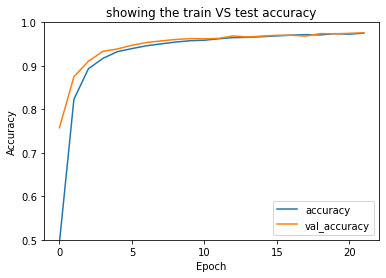

In [17]:
plt.plot(history.history['accuracy'], label = 'accuracy')
plt.plot(history.history['val_accuracy'], label = 'val_accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.title("showing the train VS test accuracy")
plt.legend(loc = 'lower right')
test_loss, test_acc = model.evaluate(xtest, ytest, verbose=2)

In [23]:
from sklearn.metrics import classification_report
y_pred=np.argmax(model.predict(xtest), axis=-1)
y_pred2=to_categorical(y_pred)

print(classification_report(ytest,y_pred2))

313/313 [==============================] - 0s 1ms/step
              precision    recall  f1-score   support

           0       0.97      0.99      0.98       980
           1       0.99      1.00      0.99      1135
           2       0.97      0.97      0.97      1032
           3       0.98      0.97      0.97      1010
           4       0.96      0.99      0.98       982
           5       0.97      0.98      0.98       892
           6       0.99      0.97      0.98       958
           7       0.96      0.98      0.97      1028
           8       0.98      0.95      0.96       974
           9       0.98      0.96      0.97      1009

   micro avg       0.98      0.98      0.98     10000
   macro avg       0.98      0.98      0.98     10000
weighted avg       0.98      0.98      0.98     10000
 samples avg       0.98      0.98      0.98     10000

